# Homework Week 10

Please be sure your functions work for vectors with a size of three and matrices that are 3x3. Bonus points if you can further generalize them for larger vectors and matrices. 

**1.	Write a function angle_between(v1, v2) where v1 and v2 are two vectors that are passed in, and the angle between them is calculated**

In [144]:
import numpy as np
from numpy.linalg import norm
import math


In [121]:
def angle_between(v1, v2):
    # returns angle in radians
    try:
        # calculate the dot product
        v2 = v2.T  #transpose v2 or np.dot() doesn't work
        dot_prod = np.dot(v1, v2)
        #find cosine of angle by dividing dot product with vector magnitudes
        cosAngle = dot_prod/(np.linalg.norm(v1)*np.linalg.norm(v2))
        #apply inverse cosine(arc cos) to cosAngle
        angle = np.arccos(cosAngle)
        return angle
    except:
        print('cannot find angle, no dividing by zero')

In [137]:
# one of a few of the test cases I used
testv1 = np.array([1, 2, 5, 10])
testv2 = np.array([4, -1, 2, -5])
# I can't get this to work
testv1 = np.squeeze(np.array([[1], [2], [5], [10]]))
testv2 = np.squeeze(np.array([[4], [-1], [2], [-5]]))
myAngle = angle_between(testv1, testv2)
print(myAngle)
# no idea how this below is supposed to work
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
#a = np.array([1, 0.001])
#b = np.array([0.001, 1])
angle_between(np.squeeze(a),np.squeeze(b))

2.0844900318073263


1.5687963274615628

**2.	Write a function called row_dot(A, r1, r2) which takes an input matrix called A, one row number identified by r1, and another row number identified by r2 and returns the dot product of the r1 and r2 rows (indexing starts at 0).**

In [59]:
def row_dot(A, r1, r2):
    # returns dot prod of r1 and r2, rows in the A matrix
    dot_prod = np.dot(A[r1], A[r2])
    return dot_prod

In [96]:
#testing row_dot
testM = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(row_dot(testM, 0, 1))
testM2 = np.array([[[1, 2, 3, 4], [-1, -2, -3, -4], [0,0,0,0], [10, 9, 8, 7]]])
print(testM2, "\n",  testM2.shape)
print(row_dot(testM2, 0, 0))
testM3 = np.array([[1,2,3, 4],[4,5,6, -1],[- 7,-8,-9, 100]])
print(row_dot(testM3, 0, 1))
print(row_dot(testM3, 1, 2))


32
[[[ 1  2  3  4]
  [-1 -2 -3 -4]
  [ 0  0  0  0]
  [10  9  8  7]]] 
 (1, 4, 4)
[[ 39  34  29  24]
 [-39 -34 -29 -24]
 [  0   0   0   0]
 [ 71  65  59  53]]
28
-222


**3.	Write a function matrix_division(m1, m2) that takes in two matrices, m1 and m2, and returns the result. What is the trick with matrix division?**

In [87]:
# matrix division - trick: you must multiply by the inverse of one of the two matrices
# multiplication is allowed, but direct division is not
# a (det) matrix multiplied by it's inverse should produce an identity matrix
def matrix_division(m1, m2):
    from numpy.linalg import inv
    
    # return 
    return np.dot(m1, inv(m2))

In [102]:
N = np.array([[0,2,1,3], 
             [3,2,8,1], 
             [1,0,0,3],
             [0,3,2,1]])
O = np.array([[10,2,1,13], 
             [3,2,8,1], 
             [1,2,3,3],
             [0,-3,-2,-1]])
print(matrix_division(N, N))
print(matrix_division(testM, testM))
print(matrix_division(O, N))

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  1.11022302e-16]
 [ 0.00000000e+00  1.00000000e+00  2.22044605e-16 -4.44089210e-16]
 [ 2.22044605e-16  5.55111512e-17  1.00000000e+00 -4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[[ 0.   1.  -0.5]
 [ 0.   2.  -1. ]
 [ 0.   3.   2.5]]
[[-9.52631579e+00 -5.26315789e-01  1.15789474e+01  7.36842105e+00]
 [ 0.00000000e+00  1.00000000e+00  2.22044605e-16 -4.44089210e-16]
 [ 7.89473684e-01  2.89473684e-01  1.31578947e-01 -5.26315789e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+00]]


**4.	Write a function is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol|π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.**

-tol < (pi/2 - theta) < tol

In [138]:
def is_orthogonal(v1, v2, tol):
    import math # for pi
    angle_test = angle_between(np.squeeze(v1), np.squeeze(v2))
    angle_test = (math.pi/2)-angle_test
    if abs(angle_test) < tol:
        return 1
    else:
        return 0

In [141]:
# Test cases for problem 4
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
# output: 1
print(is_orthogonal(a,b, 0.01))

# output: 0
print(is_orthogonal(a,b, 0.001))

# output: 0
a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
print(is_orthogonal(a,b, 0.01))

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
print(is_orthogonal(a,b, 1e-10))


1
0
0
1


**5.	Create a class called vector_calculator. __init__ should take self, vector1, and vector2. It should have two methods inside of it that are from problems 1 and 4 above (angle_between and is_orthogonal). Make sure tol is defaulted but can be overwritten. Make sure you can call angle_between and is_orthogonal through the class and return the correct results as in problems 1 and 4.**

In [147]:
class vector_calculator():
    
    def __init__(self, vector1, vector2):
        # initialize class with squeezing vectors
        self.vector1 = np.squeeze(vector1)
        self.vector2 = np.squeeze(vector2)
        
    def angle_between(self):
        # calculate theta
        dot_prod = np.dot(self.vector1, self.vector2.T)
        angle = np.arccos(dot_prod/(norm(self.vector1)*norm(self.vector2)))
        
        return angle
       
    def is_orthogonal(self, tol = 0.01):
        angle_new = abs((math.pi/2) - angle_between(self.vector1, self.vector2))
        if angle_new < tol:
            return 1
        else:
            return 0

In [154]:
a = np.array([[1], [0.001]])
b = np.array([[0.001], [1]])
vectorC = vector_calculator(a, b)
print('test case 1, 2')
print(vectorC.angle_between())
print(vectorC.is_orthogonal())
print(vectorC.is_orthogonal(.001))

a = np.array([[1], [0.001]])
b = np.array([[1], [1]])
vectorC = vector_calculator(a, b)
print('test case 3')
print(vectorC.angle_between())
print(vectorC.is_orthogonal())

# output: 1
a = np.array([[1], [1]])
b = np.array([[-1], [1]])
print('test case 4')
vectorC = vector_calculator(a, b)
print(vectorC.angle_between())
print(vectorC.is_orthogonal())
print(vectorC.is_orthogonal(1e-10))

test case 1, 2
1.5687963274615628
1
0
test case 3
0.7843981637307818
0
test case 4
1.5707963267948966
1
1


**6.	Show a graphical representation of the breast cancer data outlined in this reading https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python Be sure to describe what PCA is and incorporate the principal components in your plot. This is just exploratory, so there are many correct answers!**

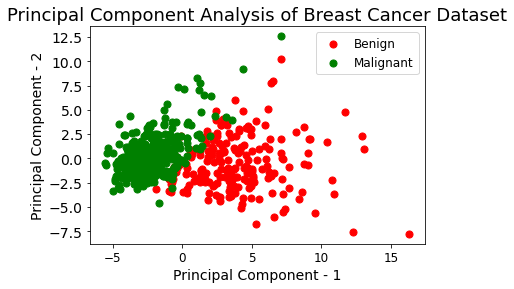

In [155]:
from IPython.display import Image
Image(filename='../PCA_Breast_Cancer_Graph.png') 

Principal Component Analysis is taking a data set with *n* variables (or values describing a data point) and reducing them to fewer component variables (principals) that describe/capture the variance of the data.  If 2 principal components are used, it's much easier to see the results in a graph (versus 3 or more).   The principal components do not describe all data variance, but usually a substantial portion of it.  Linear dimensionality reduction is the fancy/accurate term.

In the breast cancer dataset, PCA desribes about 63% of the variance.  So I think that means about 37% is "lost," but it may mean some of the data isn't very relevant to a benign/malignant outcome.

When I played with the image dataset, I changed the PCA variable number to 3 instead of 2.  Interestingly enough, the 3rd principal component only captured another 6% of the data variance.